<a href="https://colab.research.google.com/github/popgenDK/evalPopStructure/blob/main/evalPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Load function for plotting


In [3]:
#function plotCorRres for plotting correlations
source("https://raw.githubusercontent.com/GenisGE/evalAdmix/master/visFuns.R")

#load genetic test data
load(url("http://pontus.popgen.dk/albrecht/open/admixTjeck/data.Rdata"))


## summaries data



In [14]:
cat("\ngenotype matrix\n")
dim(geno)

#transpose genotype
g <- t(geno)

cat("\nNumber of Individuals\n")
(N <- nrow(geno))

cat("\nNumber of SNPs\n")
( M <- ncol(geno))

cat("\n number of individual in each population\n")
pop <- as.factor(pop)
table(pop)


genotype matrix


[1]   374 54048


Number of Individuals


[1] 374


Number of SNPs


[1] 54048


 number of individual in each population


pop
CEU CHB MXL YRI 
 99 103  64 108 

# PCA1 method. Chen and Storey 
There is no centering and the diagonal of the coverance has the mean heterozygoisty subtracted




In [9]:
# average heterozygosity per indivdual
d_hat <- colMeans(g * (2 - g)) 

# diagonal matrix of d_hat
D_hat <- diag(d_hat) 

#covariance matrix with
H_hat <- 1 / M * (t(g) %*% g) - D_hat

#perform decomposition of covariance matrix
e <- eigen(H_hat)


## plot the results

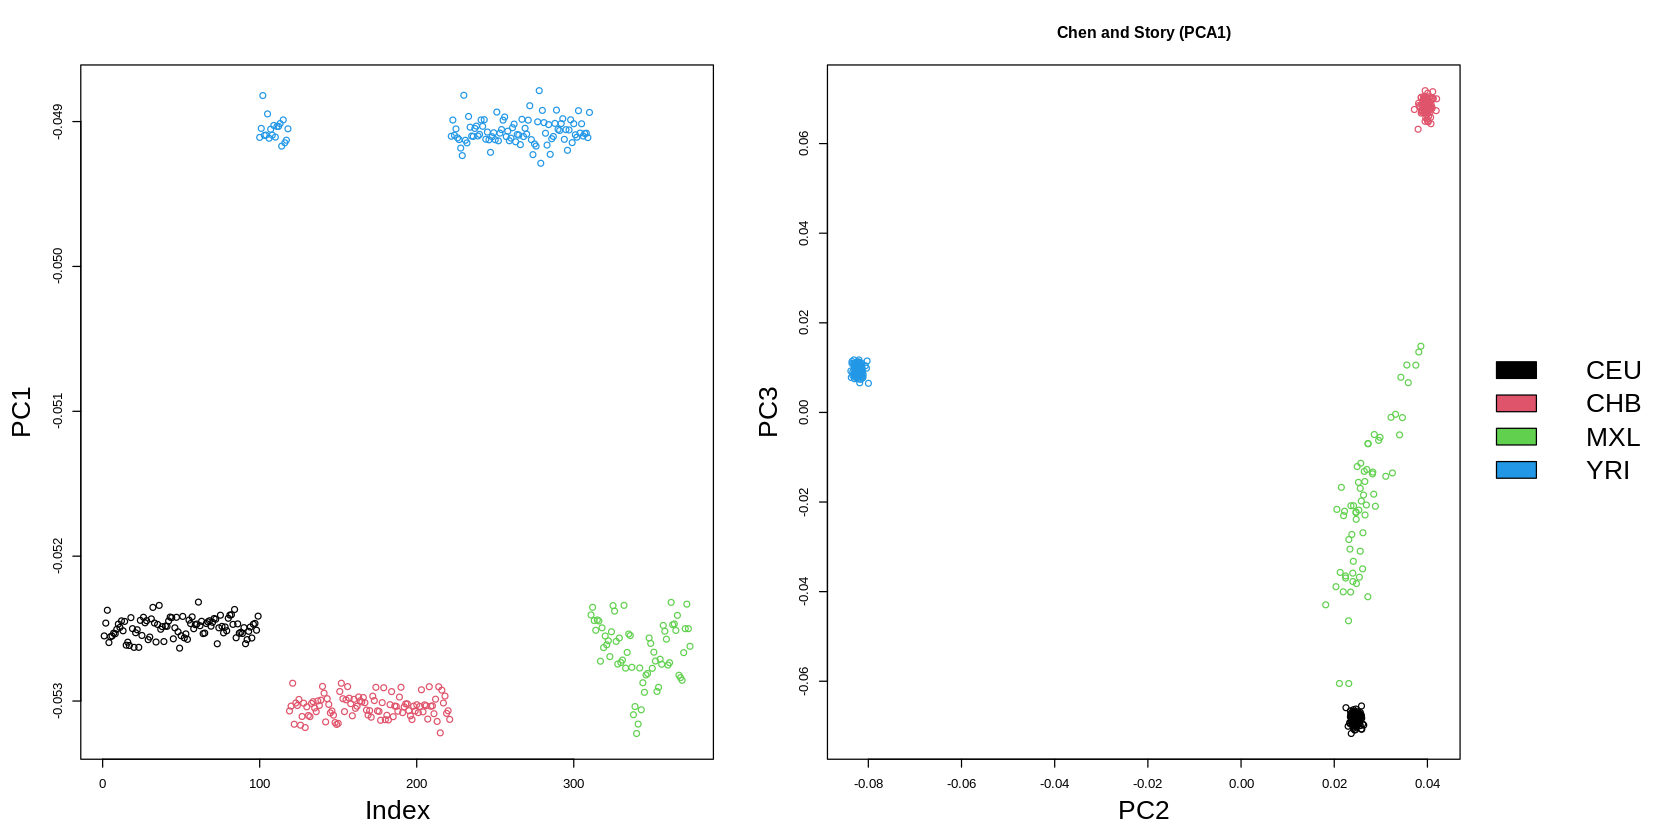

In [26]:
layout(matrix(1:3,1),w=c(4,4,1))
options(repr.plot.width=14, repr.plot.height=7)


# for the chen and story PCA the first PC is different then standard PCA used in genentics
par(mar=c(5.1,5.1,4.1,2.1))
plot(e$vectors[,1],ylab="PC1",col=pop,cex.lab=2)
plot(e$vectors[,2:3],col=pop,xlab="PC2",ylab="PC3",cex.lab=2,main="Chen and Story (PCA1)")

#plot legend
par(mar=c(0,0,0,0))
plot.new()
legend("center",fill=1:4,levels(pop),cex=2,bty="n")


##Perform PCA with *centering*

In [ ]:
#transpose genotype matrix
g <- t(geno)

#center data so each SNP has mean 0
avg <- colMeans(geno)
gtilde <- g-avg

#calculate covaraince matrix
cov <- t(gtilde) %*% gtilde